<a href="https://colab.research.google.com/github/Aditya9790/Machine-Learning/blob/main/Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Classification -- Binary Logistic Regression


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
credit_data = '/content/drive/MyDrive/Colab Notebooks/German Credit Card.csv'
credit_df =  pd.read_csv(credit_data)
credit_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   checkin_acc        1000 non-null   object
 1   duration           1000 non-null   int64 
 2   credit_history     1000 non-null   object
 3   amount             1000 non-null   int64 
 4   savings_acc        1000 non-null   object
 5   present_emp_since  1000 non-null   object
 6   inst_rate          1000 non-null   int64 
 7   personal_status    1000 non-null   object
 8   residing_since     1000 non-null   int64 
 9   age                1000 non-null   int64 
 10  inst_plans         1000 non-null   object
 11  num_credits        1000 non-null   int64 
 12  job                1000 non-null   object
 13  status             1000 non-null   int64 
dtypes: int64(7), object(7)
memory usage: 109.5+ KB


In [ ]:
credit_df.head()

,checkin_acc,duration,credit_history,amount,savings_acc,present_emp_since,inst_rate,personal_status,residing_since,age,inst_plans,num_credits,job,status
0,A11,6,A34,1169,A65,A75,4,A93,4,67,A143,2,A173,0
1,A12,48,A32,5951,A61,A73,2,A92,2,22,A143,1,A173,1
2,A14,12,A34,2096,A61,A74,2,A93,3,49,A143,1,A172,0
3,A11,42,A32,7882,A61,A74,2,A93,4,45,A143,1,A173,0
4,A11,24,A33,4870,A61,A73,3,A93,4,53,A143,2,A173,1


1. Credit Status $0$ means Good Credit
2. Credit Status $1$ means Bad Credit

In [ ]:
# Count number of good and Bad credits
credit_df.status.value_counts()

0    700
1    300
Name: status, dtype: int64

Use **status** column as **dependent **variable.<br>
And other papameters as independent variable.

In [ ]:
X_features = list(credit_df.columns)
X_features.remove('status')

As ML model needs only numerical input to it so we will encode the string parameters

In [ ]:
encoded_credit_df = pd.get_dummies(credit_df[X_features], drop_first=True)
list(encoded_credit_df)

['duration',
 'amount',
 'inst_rate',
 'residing_since',
 'age',
 'num_credits',
 'checkin_acc_A12',
 'checkin_acc_A13',
 'checkin_acc_A14',
 'credit_history_A31',
 'credit_history_A32',
 'credit_history_A33',
 'credit_history_A34',
 'savings_acc_A62',
 'savings_acc_A63',
 'savings_acc_A64',
 'savings_acc_A65',
 'present_emp_since_A72',
 'present_emp_since_A73',
 'present_emp_since_A74',
 'present_emp_since_A75',
 'personal_status_A92',
 'personal_status_A93',
 'personal_status_A94',
 'inst_plans_A142',
 'inst_plans_A143',
 'job_A172',
 'job_A173',
 'job_A174']

Add a constant and then build the model

In [ ]:
import statsmodels.api as sm

Y = credit_df.status
X = sm.add_constant(encoded_credit_df)

# Split the data and Build Model<br>


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)

# Build Logistic Regression Model using logit function

logit = sm.Logit(Y_train, X_train)
logit_model = logit.fit()

Optimization terminated successfully.
         Current function value: 0.487477
         Iterations 6


In [ ]:
logit_model.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                           Results: Logit
=====================================================================
Model:                Logit             Pseudo R-squared:  0.203     
Dependent Variable:   status            AIC:               839.9640  
Date:                 2021-11-25 20:29  BIC:               980.5023  
No. Observations:     800               Log-Likelihood:    -389.98   
Df Model:             29                LL-Null:           -489.54   
Df Residuals:         770               LLR p-value:       2.7363e-27
Converged:            1.0000            Scale:             1.0000    
No. Iterations:       6.0000                                         
---------------------------------------------------------------------
                       Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
---------------------------------------------------------------------
const                  0.4147   1.0686  0.3881 0.6980 -1.6798  2.5091
duration               0.0209   0.0098  2.1471 0.0318  0.0018  0.0400
amount                 0.0001   0.0000  2.4913 0.0127  0.0000  0.0002
inst_rate              0.2790   0.0909  3.0693 0.0021  0.1009  0.4572
residing_since         0.0968   0.0864  1.1204 0.2625 -0.0725  0.2661
age                   -0.0248   0.0095 -2.6086 0.0091 -0.0435 -0.0062
num_credits            0.3341   0.2002  1.6690 0.0951 -0.0582  0.7265
checkin_acc_A12       -0.5050   0.2268 -2.2267 0.0260 -0.9494 -0.0605
checkin_acc_A13       -0.9250   0.4089 -2.2622 0.0237 -1.7264 -0.1236
checkin_acc_A14       -1.6664   0.2393 -6.9627 0.0000 -2.1355 -1.1973
credit_history_A31    -0.0091   0.5619 -0.0161 0.9871 -1.1104  1.0923
credit_history_A32    -0.7293   0.4370 -1.6691 0.0951 -1.5857  0.1271
credit_history_A33    -0.9458   0.4886 -1.9356 0.0529 -1.9034  0.0119
credit_history_A34    -1.5067   0.4463 -3.3755 0.0007 -2.3815 -0.6318
savings_acc_A62        0.0602   0.2948  0.2040 0.8383 -0.5177  0.6380
savings_acc_A63       -0.4040   0.4205 -0.9608 0.3366 -1.2282  0.4202
savings_acc_A64       -0.9890   0.5429 -1.8217 0.0685 -2.0532  0.0751
savings_acc_A65       -0.6094   0.2586 -2.3567 0.0184 -1.1162 -0.1026
present_emp_since_A72 -0.1383   0.4264 -0.3243 0.7457 -0.9740  0.6975
present_emp_since_A73 -0.1920   0.4066 -0.4722 0.6368 -0.9890  0.6049
present_emp_since_A74 -0.6971   0.4404 -1.5829 0.1134 -1.5603  0.1661
present_emp_since_A75 -0.4318   0.4168 -1.0361 0.3001 -1.2486  0.3850
personal_status_A92   -0.2734   0.4412 -0.6197 0.5354 -1.1381  0.5913
personal_status_A93   -0.8041   0.4353 -1.8474 0.0647 -1.6572  0.0490
personal_status_A94   -0.5169   0.5066 -1.0205 0.3075 -1.5098  0.4759
inst_plans_A142       -0.3710   0.4643 -0.7991 0.4242 -1.2809  0.5389
inst_plans_A143       -0.6322   0.2591 -2.4404 0.0147 -1.1400 -0.1245
job_A172               0.2302   0.7157  0.3217 0.7477 -1.1726  1.6330
job_A173               0.3978   0.6867  0.5793 0.5624 -0.9481  1.7437
job_A174               0.3077   0.6897  0.4461 0.6555 -1.0441  1.6595
=====================================================================

"""

# Validation of Model

Model can be validated by following methods:



*   Wald's Test (Chi-Squared Test)
*   Likelihood Test
*   Pseudo R2 test

We will get significant variables which have p-value <0.05



In [ ]:
def get_significant_var(lm):
    var_p_vals_df = pd.DataFrame(lm.pvalues)
    var_p_vals_df['vars'] = var_p_vals_df.index
    var_p_vals_df.columns = ['pvals','vars']
    return list(var_p_vals_df[var_p_vals_df.pvals <= 0.05]['vars'])

In [ ]:
significant_vars = get_significant_var(logit_model)
significant_vars

['duration',
 'amount',
 'inst_rate',
 'age',
 'checkin_acc_A12',
 'checkin_acc_A13',
 'checkin_acc_A14',
 'credit_history_A34',
 'savings_acc_A65',
 'inst_plans_A143']

In [ ]:
final_logit = sm.Logit(Y_train, sm.add_constant(X_train[significant_vars]))
final_logit_model = final_logit.fit()


Optimization terminated successfully.
         Current function value: 0.508299
         Iterations 6


In [ ]:
final_logit_model.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:               Logit            Pseudo R-squared: 0.169     
Dependent Variable:  status           AIC:              835.2790  
Date:                2021-11-25 20:29 BIC:              886.8098  
No. Observations:    800              Log-Likelihood:   -406.64   
Df Model:            10               LL-Null:          -489.54   
Df Residuals:        789              LLR p-value:      2.0595e-30
Converged:           1.0000           Scale:            1.0000    
No. Iterations:      6.0000                                       
------------------------------------------------------------------
                    Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
------------------------------------------------------------------
const               0.1469   0.4697  0.3127 0.7545 -0.7737  1.0674
duration            0.0192   0.0092  2.0820 0.0373  0.0011  0.0372
amount              0.0001   0.0000  2.5883 0.0096  0.0000  0.0002
inst_rate           0.2234   0.0852  2.6222 0.0087  0.0564  0.3904
age                -0.0253   0.0083 -3.0415 0.0024 -0.0415 -0.0090
checkin_acc_A12    -0.5159   0.2099 -2.4586 0.0139 -0.9272 -0.1046
checkin_acc_A13    -1.0959   0.4012 -2.7314 0.0063 -1.8822 -0.3095
checkin_acc_A14    -1.7771   0.2266 -7.8427 0.0000 -2.2212 -1.3330
credit_history_A34 -0.7168   0.2152 -3.3308 0.0009 -1.1386 -0.2950
savings_acc_A65    -0.5830   0.2445 -2.3840 0.0171 -1.0623 -0.1037
inst_plans_A143    -0.6132   0.2141 -2.8638 0.0042 -1.0328 -0.1935
==================================================================

"""

Some of variables have -ve sign in 0.025 colums.<br>

negative value means the value of variable increads and the probability of bad credit decreases.


# Predict Model on test data

In [ ]:
#Predicting on Test Data
y_pred_df = pd.DataFrame({"actual": Y_test, "predicted_prob": final_logit_model.predict(sm.add_constant(X_test[significant_vars]))})

In [ ]:
y_pred_df.sample(10, random_state= 42)

,actual,predicted_prob
436,0,0.100145
899,1,0.422363
346,0,0.259661
60,0,0.427897
867,0,0.083752
432,0,0.290374
543,1,0.207831
361,0,0.113314
486,0,0.071270
277,0,0.185089


Assume a cutoff probability of 0.5<br>

Observation with probability >0.5 will be bad credits

and Observations with probability < 0.5 will be predicted as good credits

In [ ]:
y_pred_df['predicted'] = y_pred_df.predicted_prob.map(lambda x: 1 if x > 0.5 else 0)
y_pred_df.sample(10, random_state=42)

,actual,predicted_prob,predicted
436,0,0.100145,0
899,1,0.422363,0
346,0,0.259661,0
60,0,0.427897,0
867,0,0.083752,0
432,0,0.290374,0
543,1,0.207831,0
361,0,0.113314,0
486,0,0.071270,0
277,0,0.185089,0


In [ ]:
#Creating Confusion Matrix 

from sklearn import metrics
def draw_cm(actual, predicted):
    cm = metrics.confusion_matrix(actual, predicted)
    sns.heatmap(cm, annot=True, fmt ='.2f', xticklabels=["Bad Credit", "Good Credit"], yticklabels=["Bad Credit", "Good Credit"])
    plt.ylabel('True label')
    plt.xlabel('Predicted Label')
    plt.show()

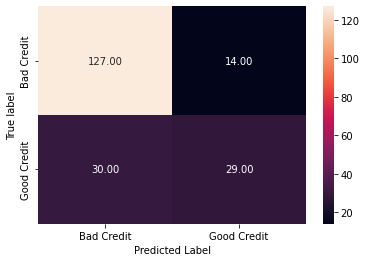

In [ ]:
draw_cm(y_pred_df.actual, y_pred_df.predicted)

In [ ]:
#Sensitivity (Recall/ True Positive Rate), Specificity (True Negative Rate), Precision and F-Score.
#Sensitivity  = TP / (TP+FN) predicted class positive given tht actual class is positive
#Specificity = TN / (TN+FP) predicted class negative given that actual class is negative
#Precision = TP / (TP+FP) actual value is po
#F-Score = 2 *Recall*Precision/(Recall + Precision)

print(metrics.classification_report(y_pred_df.actual, y_pred_df.predicted))

              precision    recall  f1-score   support

           0       0.81      0.90      0.85       141
           1       0.67      0.49      0.57        59

    accuracy                           0.78       200
   macro avg       0.74      0.70      0.71       200
weighted avg       0.77      0.78      0.77       200



/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


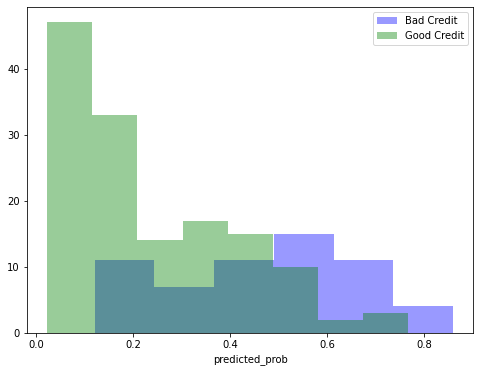

In [ ]:
plt.figure(figsize=(8,6))
sns.distplot(y_pred_df[y_pred_df.actual == 1]["predicted_prob"], kde = False,color='b', label = 'Bad Credit')

sns.distplot(y_pred_df[y_pred_df.actual == 0]["predicted_prob"], kde = False,color='g', label = 'Good Credit')

plt.legend()
plt.show()

Larger the overlap larger misclassification

#Receiver Operating Curve 
This can be used to understand the performnce of classification model.

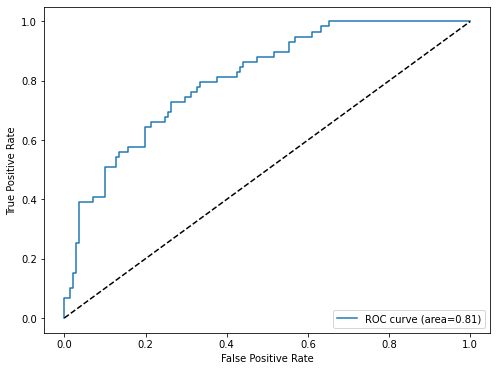

In [ ]:
#Receiver OPerating Curve - plot between sensitivity(TP rate) on vertical axis and 1- specificity (FP rate) on horizontal axis

def draw_roc(actual, probs):
    fpr, tpr, thresholds = metrics.roc_curve(actual, probs, drop_intermediate=False)
    auc_score = metrics.roc_auc_score(actual,probs) # area under curve
    
    plt.figure(figsize=(8,6))
    plt.plot(fpr,tpr, label = 'ROC curve (area=%0.2f)'% auc_score)
    
    plt.plot([0,1],[0,1],'k--') # pass class values
    plt.xlim = ([0.0, 1.0]) # x, y limit
    plt.ylim = ([0.0, 1.05])
    
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    
    plt.legend(loc = "lower right")
    plt.show()
    
    return fpr, tpr, thresholds

fpr, tpr, thresholds = draw_roc(y_pred_df.actual, y_pred_df.predicted_prob)
 


The diagonal line represent a case of not using a model that means no discrimination between positice and negative<br>

Line above diagonal line captures how sensitivity and specificity changes when cutoff freq changes.<br>

Model with higher area under curve is preferred.
Area under curve must be > 0.7

In [ ]:
# Area under the curve
auc_score = metrics.roc_auc_score(y_pred_df.actual,y_pred_df.predicted_prob)
auc_score

0.8085106382978724